In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [19]:
unbatched_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

batched_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

In [20]:
unbatched_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    run_eagerly=True
)

batched_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    run_eagerly=True
)

In [21]:
unbatched_history =  unbatched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 0s - loss: 1.0676 - accuracy: 0.3333 - val_loss: 1.1089 - val_accuracy: 0.1333 - 174ms/epoch - 58ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9301 - accuracy: 0.5778 - val_loss: 1.0772 - val_accuracy: 0.5000 - 88ms/epoch - 29ms/step
Epoch 3/200
3/3 - 0s - loss: 0.8464 - accuracy: 0.7333 - val_loss: 0.9968 - val_accuracy: 0.5000 - 93ms/epoch - 31ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7413 - accuracy: 0.7333 - val_loss: 0.8212 - val_accuracy: 0.5000 - 88ms/epoch - 29ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6427 - accuracy: 0.7333 - val_loss: 0.7221 - val_accuracy: 0.5000 - 91ms/epoch - 30ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5486 - accuracy: 0.7333 - val_loss: 0.6945 - val_accuracy: 0.5000 - 96ms/epoch - 32ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4758 - accuracy: 0.7333 - val_loss: 0.7061 - val_accuracy: 0.5000 - 89ms/epoch - 30ms/step
Epoch 8/200
3/3 - 0s - loss: 0.4326 - accuracy: 0.7333 - val_loss: 0.5668 - val_accuracy: 0.5333 - 89ms/epoch - 30ms/step
Epoch 9/200
3/3 - 0s - 

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

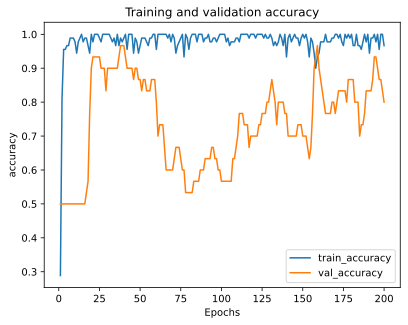

In [23]:
plot_metric(batched_history, 'accuracy')

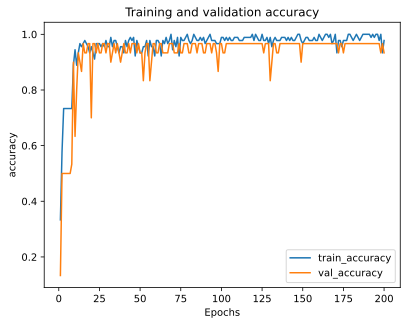

In [24]:
plot_metric(unbatched_history, 'accuracy')

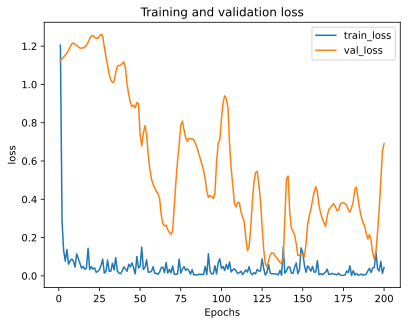

In [16]:
plot_metric(batched_history, 'loss')

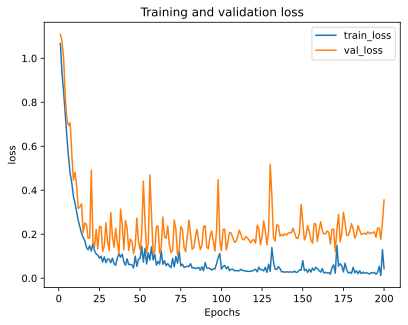

In [25]:
plot_metric(unbatched_history, 'loss')

In [17]:
batched_model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1934 - accuracy: 0.9000 - 47ms/epoch - 47ms/step


[0.1934112012386322, 0.9000000357627869]